<a href="https://colab.research.google.com/github/yfhkucing/regression_bms/blob/master/Model_revisi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [343]:
import numpy as np
import pandas as pd

In [344]:
feature = pd.read_excel('/content/input_big_4.xlsx',sheet_name='Sheet2')
label = pd.read_excel('/content/data_big_4.xlsx', sheet_name='Sheet2')

In [345]:
feature.describe()

,Jendela_1,Jendela_2,Jendela_3,Jendela_4,Jendela_5,Jendela_6,Jendela_7,Jendela_8,Jendela_9,AC,...,Fan i/3,Fan i/4,Fan i/5,Fan i/6,Fan o/1,Fan o/2,Fan o/3,Fan o/4,Fan o/5,Fan o/6
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,...,5760.000000,5760.00000,5760.000000,5760.00000,5760.00000,5760.000000,5760.000000,5760.00000,5760.000000,5760.00000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.499826,0.75000,0.500000,0.25000,0.75000,0.500000,0.499826,0.75000,0.500000,0.25000
std,0.500043,0.500043,0.500043,0.500043,0.500043,0.500043,0.500043,0.500043,0.500043,0.500043,...,0.500043,0.43305,0.500043,0.43305,0.43305,0.500043,0.500043,0.43305,0.500043,0.43305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.75000,0.000000,0.00000,0.75000,0.000000,0.000000,0.75000,0.000000,0.00000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.000000,1.00000,0.500000,0.00000,1.00000,0.500000,0.000000,1.00000,0.500000,0.00000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,0.25000,1.00000,1.000000,1.000000,1.00000,1.000000,0.25000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000


In [346]:
label

,koor_x,koor_y,Vx,Vy,Temp
0,1,30,0.002399,-0.073255,27.417225
1,1,63,0.002269,-0.075449,27.366829
2,1,94,0.002446,-0.076216,27.273479
3,1,113,0.002551,-0.073114,27.065680
4,1,145,0.002307,-0.072831,26.763813
...,...,...,...,...,...
5755,104,68,0.032203,0.101951,26.107449
5756,104,102,0.095899,0.079573,25.759459
5757,104,125,0.055757,0.087645,25.356976
5758,104,161,0.044939,0.072076,24.928185


In [347]:
def norm(df):
  df=(df-df.min())/(df.max()-df.min())
  return df

In [348]:
def remap(df,new_max,new_min):
  df = (df-df.min())/(df.max()-df.min())*(new_max - new_min) + new_min
  return df

In [349]:
array_x = []

for i in range(30):
  frame= feature[i::30]
  frame= norm(frame)
  array_x.append(frame)

In [350]:
array_y = []

for i in range(30):
  frame= label[i::30]
  frame = frame.drop(['koor_x','koor_y','Temp'],axis=1)
  frame= remap(frame,1,-1)
  array_y.append(frame)

In [351]:
array_x[1]

,Jendela_1,Jendela_2,Jendela_3,Jendela_4,Jendela_5,Jendela_6,Jendela_7,Jendela_8,Jendela_9,AC,...,Fan i/3,Fan i/4,Fan i/5,Fan i/6,Fan o/1,Fan o/2,Fan o/3,Fan o/4,Fan o/5,Fan o/6
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5611,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5641,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5671,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5701,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [352]:
array_y[1].describe()

,Vx,Vy
count,192.000000,192.000000
mean,-0.216241,-0.244237
std,0.328182,0.380435
min,-1.000000,-1.000000
25%,-0.380641,-0.419441
50%,-0.275035,-0.265176
75%,-0.219310,-0.179103
max,1.000000,1.000000


In [353]:
#data input tiap skenario untuk titik 1-30
array_x[1].describe()

,Jendela_1,Jendela_2,Jendela_3,Jendela_4,Jendela_5,Jendela_6,Jendela_7,Jendela_8,Jendela_9,AC,...,Fan i/3,Fan i/4,Fan i/5,Fan i/6,Fan o/1,Fan o/2,Fan o/3,Fan o/4,Fan o/5,Fan o/6
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.750000,0.500000,0.250000,0.750000,0.500000,0.500000,0.750000,0.500000,0.250000
std,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,0.501307,...,0.501307,0.434145,0.501307,0.434145,0.434145,0.501307,0.501307,0.434145,0.501307,0.434145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000,0.750000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.500000,1.000000,0.500000,0.000000,1.000000,0.500000,0.500000,1.000000,0.500000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [354]:
#data output tiap skenario untuk titik 1-30
array_y[1].describe()

,Vx,Vy
count,192.000000,192.000000
mean,-0.216241,-0.244237
std,0.328182,0.380435
min,-1.000000,-1.000000
25%,-0.380641,-0.419441
50%,-0.275035,-0.265176
75%,-0.219310,-0.179103
max,1.000000,1.000000


In [355]:
! mkdir models

y_testing = []

import joblib
from sklearn.linear_model import LinearRegression

#model
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

#preprocessing and metric
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

for i in range(30):
  x = array_x[i]
  y = array_y[i]
  x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state= 10)
  y_testing.append(y_test)
  #fitting
  regressor = Lasso(alpha=0.1)
  regressor.fit(x_train,y_train)
  joblib.dump(regressor,f'/content/models/model {i}')

mkdir: cannot create directory ‘models’: File exists


In [356]:
skor_r2=[]
mae_=[]
rmse = []
y_predict = []
for i in range(30):
  model = joblib.load(f'/content/models/model {i}')
  y_pred = model.predict(x_test)
  Skor_r2 = r2(y_test,y_pred)
  RMSE = mse(y_test,y_pred,squared=False)
  MAE = mae(y_test,y_pred)
  y_predict.append(y_pred)
  skor_r2.append(Skor_r2)
  mae_.append(MAE)
  rmse.append(RMSE)

In [357]:
skor_r2 = np.array(skor_r2)
rmse = np.array(rmse)
mae_=np.array(mae_)
y_predict = np.array(y_predict)
y_testing = np.array(y_testing)

In [358]:
skor_r2.shape, rmse.shape, y_predict.shape, y_testing.shape

((30,), (30,), (30, 48, 2), (30, 48, 2))

In [359]:
r2_matrix = skor_r2.reshape(5,6)
rmse_matrix = rmse.reshape(5,6)
mae_matrix = mae_.reshape(5,6)

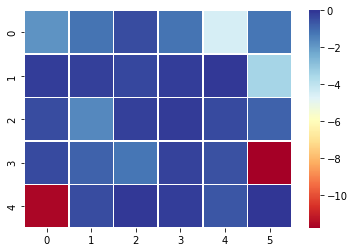

In [360]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(r2_matrix, linewidth=0.5, cmap="RdYlBu")
plt.show()

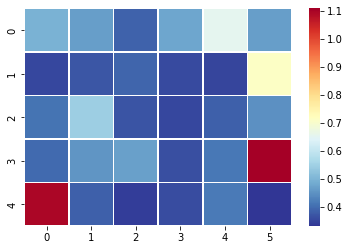

In [361]:
bx = sns.heatmap(rmse_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

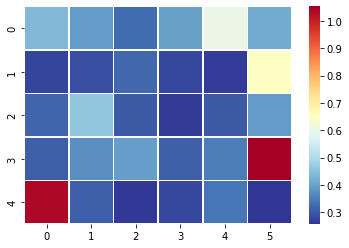

In [362]:
bx = sns.heatmap(mae_matrix, linewidth=0.5, cmap="RdYlBu_r")
plt.show()

In [363]:
scenarios = 0   #0-28
indexing = 0    # vx,vy,temp

In [364]:
a = y_testing[(...,scenarios,indexing)]
b = y_predict[(...,scenarios,indexing)]
'''
a = np.array(a)
b = np.array(b)
a = a.reshape(5,6)
b = b.reshape(5,6)
print('reshaped')
'''

"\na = np.array(a)\nb = np.array(b)\na = a.reshape(5,6)\nb = b.reshape(5,6)\nprint('reshaped')\n"

In [365]:
a

array([-0.36106229, -0.27250586, -0.23135717, -0.23653589, -0.64581072,
       -0.23452934,  0.37791171,  0.17374232,  0.00604292,  0.29873134,
       -0.01964762, -0.11086908,  0.23489837,  0.67211358,  0.60881748,
        0.41065633,  0.34029956, -0.41321735,  0.47451307, -0.15004486,
       -0.39737058, -0.20279366, -0.16159944, -1.        , -1.        ,
        0.50166812,  0.1427224 ,  0.53769185,  0.65423153,  0.35162297])

In [366]:
b

array([-0.30839979, -0.1879953 , -0.02311124, -0.15377096, -0.60461789,
       -0.18807256,  0.36608004,  0.33555745,  0.14112628,  0.36339554,
        0.16989834, -0.12741525,  0.28214019,  0.40637158,  0.12800456,
        0.30811698,  0.44189254, -0.15263629,  0.35617244, -0.05458811,
       -0.19254234,  0.04961708,  0.03995598, -0.96148767, -0.95979016,
        0.45547605,  0.18008349,  0.32795147,  0.46140225,  0.27940847])

In [367]:
df_koor_x = pd.DataFrame(label['koor_x'])
df_koor_y = pd.DataFrame(label['koor_y'])
df_koor = df_koor_x.join(df_koor_y)

In [368]:
df=[]
for i in range(192):
  df.append(df_koor[i:i+30])

df=pd.concat(df)

In [369]:
'''
def suhu(y):
  df_y = pd.DataFrame(y[...,scenarios,0])
  df_z = pd.DataFrame(y[...,scenarios,1])
  df_z.rename(columns={0:1},inplace=True)
  df_y = df_y.join(df_z)
  df_y = df_y.join(df_koor)
  df_y.rename(columns={0:'Vx',1:'suhu'},inplace=True)
  df_y.pop('Vx')
  return df_y
  '''

"\ndef suhu(y):\n  df_y = pd.DataFrame(y[...,scenarios,0])\n  df_z = pd.DataFrame(y[...,scenarios,1])\n  df_z.rename(columns={0:1},inplace=True)\n  df_y = df_y.join(df_z)\n  df_y = df_y.join(df_koor)\n  df_y.rename(columns={0:'Vx',1:'suhu'},inplace=True)\n  df_y.pop('Vx')\n  return df_y\n  "

In [370]:
'''
suhu_test = suhu(y_testing)
suhu_pred = suhu(y_predict)
'''

'\nsuhu_test = suhu(y_testing)\nsuhu_pred = suhu(y_predict)\n'

In [371]:
r2(a,b), mse(a,b), mae(a,b)

(0.8654273793674403, 0.026804551924507872, 0.1287827134387947)

In [372]:
'''
import plotly.graph_objects as go
fig = go.Figure(data =
    go.Contour(
        z = suhu_test['suhu'].tolist(),
        x = suhu_test['koor_x'].tolist(),
        y = suhu_test['koor_y'].tolist()
    ))
fig.show()
'''

"\nimport plotly.graph_objects as go\nfig = go.Figure(data =\n    go.Contour(\n        z = suhu_test['suhu'].tolist(),\n        x = suhu_test['koor_x'].tolist(),\n        y = suhu_test['koor_y'].tolist()\n    ))\nfig.show()\n"

In [373]:
'''
fig = go.Figure(data =
    go.Contour(
        z = suhu_pred['suhu'].tolist(),
        x = suhu_pred['koor_x'].tolist(),
        y = suhu_pred['koor_y'].tolist()
    ))
fig.show()\
'''

"\nfig = go.Figure(data =\n    go.Contour(\n        z = suhu_pred['suhu'].tolist(),\n        x = suhu_pred['koor_x'].tolist(),\n        y = suhu_pred['koor_y'].tolist()\n    ))\nfig.show()"

In [374]:
import plotly.graph_objects as go
from plotly.figure_factory import create_quiver
scenarios = 0

In [375]:
def kec_angin(y,scenarios):
  df_x = pd.DataFrame(y[...,scenarios,0])
  df_y = pd.DataFrame(y[...,scenarios,1])
  df_y.rename(columns={0:1},inplace=True)
  df_x = df_x.join(df_y)
  df_x = df_x.join(df_koor)
  df_x.rename(columns={0:'Vx',1:'Vy',},inplace=True)
  return df_x

In [376]:
angin_test = kec_angin(y_testing,scenarios)
angin_pred = kec_angin(y_predict,scenarios)

In [377]:
def tampilan_vektor(Y,scale,arrow):
  x = Y['koor_x']
  y = Y['koor_y']
  u = Y['Vx']
  v = Y['Vy']

  fig = create_quiver(x,y,u,v, scale=scale, arrow_scale=arrow)
  
  fig.show()

In [378]:
tampilan_vektor(angin_test,10,0.1)

In [379]:
tampilan_vektor(angin_pred,10,0.1)

In [380]:
!zip -r /content/models.zip /content/models

updating: content/models/ (stored 0%)
updating: content/models/model 3 (deflated 52%)
updating: content/models/model 28 (deflated 50%)
updating: content/models/model 25 (deflated 51%)
updating: content/models/model 0 (deflated 52%)
updating: content/models/model 22 (deflated 48%)
updating: content/models/model 4 (deflated 51%)
updating: content/models/model 23 (deflated 52%)
updating: content/models/model 7 (deflated 48%)
updating: content/models/model 11 (deflated 52%)
updating: content/models/model 10 (deflated 52%)
updating: content/models/model 17 (deflated 51%)
updating: content/models/model 5 (deflated 50%)
updating: content/models/model 14 (deflated 51%)
updating: content/models/model 15 (deflated 51%)
updating: content/models/model 27 (deflated 49%)
updating: content/models/model 12 (deflated 50%)
updating: content/models/model 6 (deflated 51%)
updating: content/models/model 1 (deflated 52%)
updating: content/models/model 21 (deflated 49%)
updating: content/models/model 18 (def